In [1]:
import pandas as pd
import numpy as npo
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Downloads/Uber Request Data.csv')

In [3]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
data.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
set(data['Pickup point'])

{'Airport', 'City'}

In [7]:
set(data['Status'])

{'Cancelled', 'No Cars Available', 'Trip Completed'}

In [8]:
#sns.pairplot(data,kind='kde',diag_kind='dist', hue='Status')

In [9]:
dt.datetime.strptime('13-07-2016 08:33:16', '%d-%m-%Y %H:%M:%S')

datetime.datetime(2016, 7, 13, 8, 33, 16)

In [10]:
def standard_datetime(_datetime):
    try:
        return dt.datetime.strptime(_datetime, '%d/%m/%Y %H:%M')
    except:
        return dt.datetime.strptime(_datetime, '%d-%m-%Y %H:%M:%S')

In [11]:
data['New Drop timestamp'] = data.loc[~data['Drop timestamp'].isnull()]['Drop timestamp']\
                                                                    .apply(lambda x: standard_datetime(x))

In [12]:
data['New Request timestamp'] = data['Request timestamp'].apply(lambda x: standard_datetime(x))

In [13]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,New Drop timestamp,New Request timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 13:00:00,2016-07-11 11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 18:47:00,2016-07-11 17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:58:00,2016-07-12 09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 22:03:00,2016-07-12 21:08:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 09:25:47,2016-07-13 08:33:16


In [14]:
data['hour_of_day'] = data['New Request timestamp'].apply(lambda x: x.hour)

/Users/ankitasingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


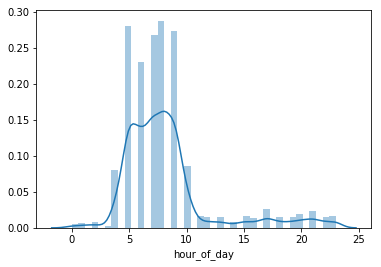

In [15]:
sns.distplot(data.loc[(data['Status'] == 'Cancelled') & (data['Pickup point'] == 'City')]['hour_of_day'])

/Users/ankitasingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


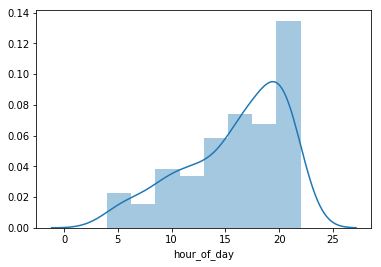

In [16]:
sns.distplot(data.loc[(data['Status'] == 'Cancelled') & (data['Pickup point'] == 'Airport')]['hour_of_day'])

/Users/ankitasingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


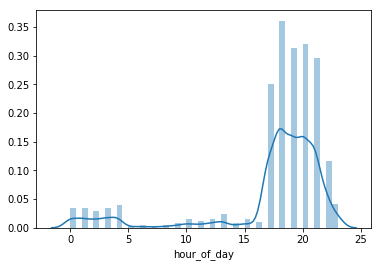

In [17]:
sns.distplot(data.loc[(data['Status'] == 'No Cars Available') & (data['Pickup point'] == 'Airport')]['hour_of_day'])

/Users/ankitasingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


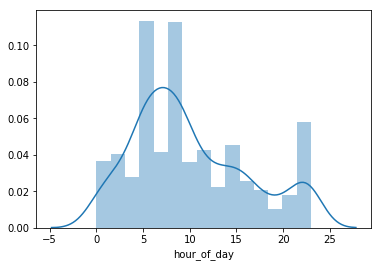

In [18]:
sns.distplot(data.loc[(data['Status'] == 'No Cars Available') & (data['Pickup point'] == 'City')]['hour_of_day'])

In [19]:
supply_table = data.loc[data['Status'] == 'Trip Completed'].groupby(['Pickup point', 'hour_of_day'])\
                                                           .agg({'Request id': 'nunique'}).reset_index()
supply_table.columns = ['Pickup point', 'hour_of_day', 'supply']
supply_table.head()

,Pickup point,hour_of_day,supply
0,Airport,0,23
1,Airport,1,13
2,Airport,2,16
3,Airport,3,15
4,Airport,4,36


In [20]:
demand_table = data.groupby(['Pickup point', 'hour_of_day']).agg({'Request id': 'nunique'}).reset_index()
demand_table.columns = ['Pickup point', 'hour_of_day', 'demand']
demand_table.head()

,Pickup point,hour_of_day,demand
0,Airport,0,53
1,Airport,1,42
2,Airport,2,41
3,Airport,3,45
4,Airport,4,72


In [21]:
demand_supply_df = pd.merge(demand_table, supply_table, on=['Pickup point', 'hour_of_day'], how='left')
demand_supply_df.head()

,Pickup point,hour_of_day,demand,supply
0,Airport,0,53,23
1,Airport,1,42,13
2,Airport,2,41,16
3,Airport,3,45,15
4,Airport,4,72,36


In [22]:
demand_supply_df['demand_supply_gap'] = demand_supply_df['demand'] - demand_supply_df['supply']
demand_supply_df

,Pickup point,hour_of_day,demand,supply,demand_supply_gap
0,Airport,0,53,23,30
1,Airport,1,42,13,29
2,Airport,2,41,16,25
3,Airport,3,45,15,30
4,Airport,4,72,36,36
5,Airport,5,92,85,7
6,Airport,6,89,81,8
7,Airport,7,83,75,8
8,Airport,8,73,67,6
9,Airport,9,89,74,15


In [23]:
pick_from_airport = demand_supply_df.loc[demand_supply_df['Pickup point'] == 'Airport']

In [24]:
pick_from_city = demand_supply_df.loc[demand_supply_df['Pickup point'] == 'City']

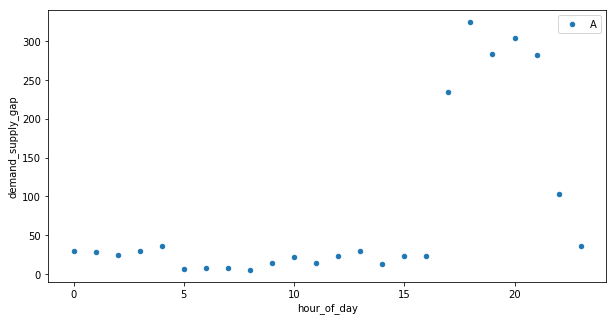

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
ax1 = pick_from_airport.plot(x="hour_of_day", y="demand_supply_gap", legend=False, kind='scatter', ax=ax)
plt.legend('Airport')
plt.show()

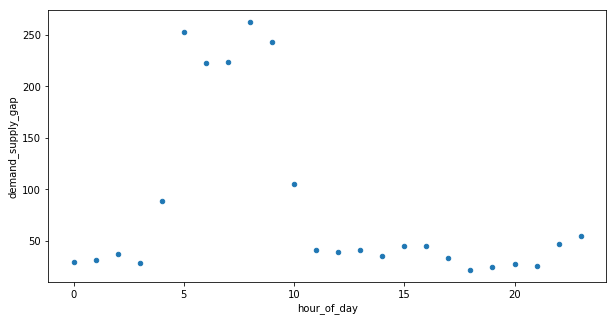

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
ax1 = pick_from_city.plot(x="hour_of_day", y="demand_supply_gap", legend=False, kind='scatter', ax=ax)
plt.show()